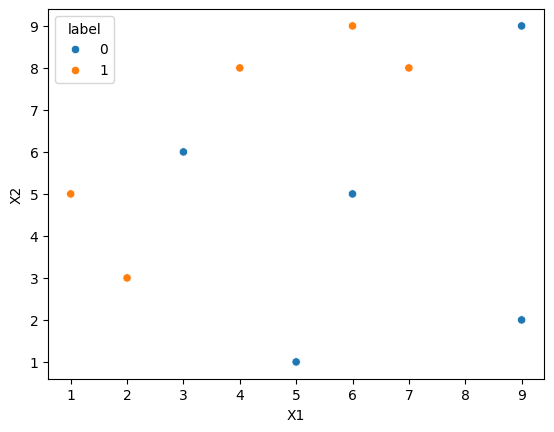

In [ ]:
import pandas as pd
import numpy as np
from mlxtend.plotting import plot_decision_regions
df = pd.DataFrame()
df['X1']=[1,2,3,4,5,6,6,7,9,9]
df['X2']=[5,3,6,8,1,9,5,8,9,2]
df['label']=[1,1,0,1,0,1,0,1,0,0]
import seaborn as sns
sns.scatterplot(x=df['X1'],y=df['X2'],hue=df['label'])
df['weights']=1/df.shape[0]

from sklearn.tree import DecisionTreeClassifier

dt1 = DecisionTreeClassifier(max_depth=1)
x = df.iloc[:,0:2].values
y = df.iloc[:,2].values

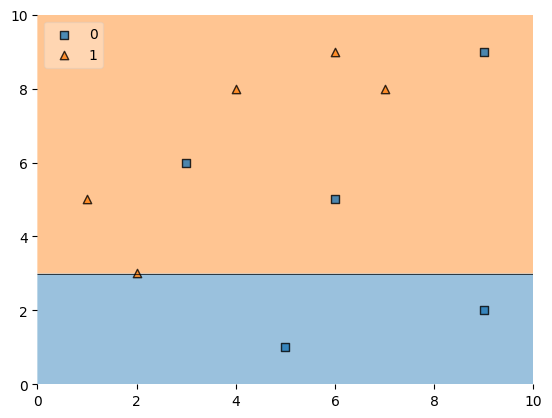

In [ ]:
dt1.fit(x,y)
from sklearn.tree import plot_tree
# Include the target variable 'y' in the function call
plot_decision_regions(x, y, clf=dt1, legend=2)
df['y_pred'] = dt1.predict(x)
def calculate_model_weight(error):
  return 0.5*np.log((1-error)/(error))

In [ ]:
alpha1 = calculate_model_weight(0.3)
alpha1

0.42364893019360184

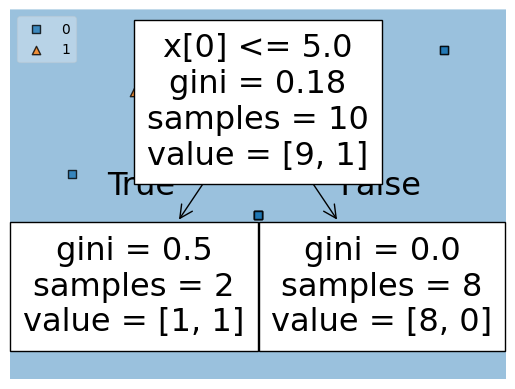

In [ ]:
def update_row_weights(row, alpha=0.423):
    if row['label'] == row['y_pred']:
        return row['weights'] * np.exp(-alpha)
    else:
        return row['weights'] * np.exp(alpha)

df['updated_weights'] = df.apply(update_row_weights, axis=1)
# Calculate and assign normalized_weights
df['normalized_weights'] = df['updated_weights'] / df['updated_weights'].sum()  # Normalize updated weights
df['normalized_weights'].sum()

df['cumsum_upper'] = np.cumsum(df['normalized_weights'])
df['cumsum_lower'] = df['cumsum_upper'] - df['normalized_weights']

def create_new_dataset(df):
    indices = []
    for i in range(df.shape[0]):
        a = np.random.random()
        for index, row in df.iterrows():
            if row['cumsum_upper'] > a and a > row['cumsum_lower']:
                indices.append(index)
    return indices

index_values = create_new_dataset(df)
second_df = df.iloc[index_values, [0, 1, 2, 3]]

dt2 = DecisionTreeClassifier(max_depth=1)

x = second_df.iloc[:, 0:2].values
y = second_df.iloc[:, 2].values

dt2.fit(x, y)

# Assuming plot_tree is imported and you intend to plot the tree structure of dt2
from sklearn.tree import plot_tree
plot_tree(dt2)

# Assuming plot_decision_regions is imported and you want to plot decision boundaries
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x, y, clf=dt2, legend=2)

second_df['y_pred'] = dt2.predict(x)

alpha2 = calculate_model_weight(0.1)

In [ ]:
 def update_row_weights(row, alpha=1.09):
    if row['label'] == row['y_pred']:
        return row['weights'] * np.exp(-alpha)
    else:
        return row['weights'] * np.exp(alpha)

second_df['updated_weights'] = second_df.apply(update_row_weights, axis=1)
# Calculate and assign normalized_weights
second_df['normalized_weights'] = second_df['updated_weights'] / second_df['updated_weights'].sum()  # Normalize updated weights


second_df['normalized_weights'].sum()

second_df['cumsum_upper'] = np.cumsum(second_df['normalized_weights'])
second_df['cumsum_lower'] = second_df['cumsum_upper'] - second_df['normalized_weights']

# Display specific columns for review
second_df[['X1', 'X2', 'label', 'weights', 'y_pred', 'normalized_weights', 'cumsum_lower', 'cumsum_upper']]

alpha3 = calculate_model_weight(0.7)
print(alpha1, alpha2, alpha3)

query = np.array([1, 5]).reshape(1, 2)
dt1_pred = dt1.predict(query)
dt2_pred = dt2.predict(query)


0.42364893019360184 1.0986122886681098 -0.4236489301936017
